# 연습

#### 패키지 불러오기

In [2]:
!pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.1 kB 487.6 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 466.9 kB/s eta 0:00:00


In [3]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

# 다른 방식(.dot -> .png 형식, 출력화면에 맞는)으로 Tree 출력
from subprocess import call
from IPython.display import Image

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# # Tree 생성경로 지정
# import os
# # PATH 설정: graphviz를 설치 했다면, 설치 된 경로를 설정. 기본 경로는 아래 예제 참고(linux에서 설치된 경로 확인 및 변경 필요)
# # os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin/"
# os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin/"

#### 그래프 옵션 지정

In [4]:
# 그래프 한글폰트 적용:맑은 고딕
matplotlib.rc("font", family = "Malgun Gothic")
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

### 데이터 구성하기

In [5]:
# 데이터 불러오기
df_raw = pd.read_csv("Big Data 분석/HMEQ.CSV")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [6]:
# Data 구조 확인
print("Data 구조:", df_raw.shape)
print()
print("변수 : ", df_raw.columns)

Data 구조: (3748, 13)

변수 :  Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')


#### 결측치 처리

In [7]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [9]:
# fillna: 결측치를 채우는 함수
# JOB 변수의 결측치는 Other로 입력, inplace: fillna 함수 적용 후 ds_hmeq 데이터에 저장, False면 저장 안 함
df_raw["JOB"].fillna("Other", inplace = True)

# 숫자형 열만 선택하여 평균값으로 결측치 대체
numeric_cols = df_raw.select_dtypes(include=['number']).columns
df_raw[numeric_cols] = df_raw[numeric_cols].fillna(df_raw[numeric_cols].mean())

In [10]:
# 결측치 처리 확인
df_raw.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

#### 범주형 설명변수 더미 변환

In [11]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,False,True,False,False,True,False,False,False
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,False,True,False,False,True,False,False,False
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,False,True,False,True,False,False,False,False
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,False,True,True,False,False,False,False,False
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,False,True,False,True,False,False,False,False


#### 데이터 분리/ 분할

In [12]:
# 데이터 분리:설명변수, 목표변수 구분
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["BAD"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (3748, 18)
분할 후 설명변수 데이터 :Train (2623, 18)   Test (1125, 18)


In [13]:
display(df_raw.head(10))
display(df_raw_x.head(10))

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827
5,0,2900,103949,112505.0,HomeImp,Office,1.0,0,0.0,96.102330,0.0,13,30.051136
6,0,2900,104373,120702.0,HomeImp,Office,2.0,0,0.0,101.540297,0.0,13,29.915859
7,1,2900,7750,67996.0,HomeImp,Other,16.0,3,0.0,122.204663,2.0,8,36.211348
8,1,2900,61962,70915.0,DebtCon,Mgr,2.0,0,0.0,282.801659,3.0,37,49.206396
9,0,3000,104570,121729.0,HomeImp,Office,2.0,0,0.0,85.884372,0.0,14,32.059783


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,False,True,False,False,True,False,False,False
1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,False,True,False,False,True,False,False,False
2,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,False,True,False,True,False,False,False,False
3,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,False,True,True,False,False,False,False,False
4,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,False,True,False,True,False,False,False,False
5,2900,103949,112505.0,1.0,0,0.0,96.102330,0.0,13,30.051136,False,True,False,True,False,False,False,False
6,2900,104373,120702.0,2.0,0,0.0,101.540297,0.0,13,29.915859,False,True,False,True,False,False,False,False
7,2900,7750,67996.0,16.0,3,0.0,122.204663,2.0,8,36.211348,False,True,False,False,True,False,False,False
8,2900,61962,70915.0,2.0,0,0.0,282.801659,3.0,37,49.206396,True,False,True,False,False,False,False,False
9,3000,104570,121729.0,2.0,0,0.0,85.884372,0.0,14,32.059783,False,True,False,True,False,False,False,False


In [14]:
# Data 구조 확인
print("Data 구조:", df_raw_x.columns)
print()
print("변수 : ", df_train_x.columns)

Data 구조: Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr',
       'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self'],
      dtype='object')

변수 :  Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr',
       'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self'],
      dtype='object')


### @불균형 자료 사전 처리:over-, under-sampling-SMOTE

class imblearn.over_sampling.SMOTE(*, sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)


In [15]:
!pip install imblearn

In [16]:
# 샘플링 : Over-sampling 등
from imblearn.over_sampling import SMOTE

In [17]:
# 목표변수 빈도 확인
print(df_raw.value_counts(["BAD"]),"\n")
print("BAD=1 비율  ", df_raw.value_counts(df_raw["BAD"]==1)/len(df_raw))

BAD
0      3403
1       345
Name: count, dtype: int64 

BAD=1 비율   BAD
False    0.907951
True     0.092049
Name: count, dtype: float64


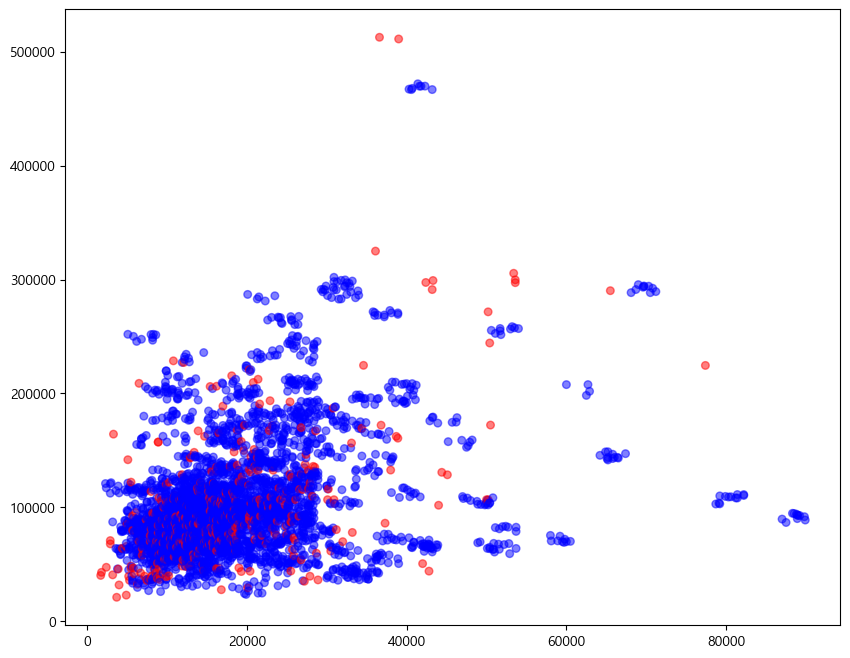

In [18]:
# 목표변수 산점도 확인
plt.figure(figsize=(10,8))
# 색깔 지정
df_raw['color'] = np.where(df_raw["BAD"]==1, "red", "blue")
# plt.scatter(df_raw['LOAN'],df_raw['VALUE'],c=df_raw['BAD'], s=30, alpha=0.5)
plt.scatter(df_raw['LOAN'],df_raw['VALUE'],c=df_raw['color'], s=30, alpha=0.5)

plt.show()

In [19]:
# Over-sampling 설정
sm = SMOTE(sampling_strategy='auto', random_state=1234)

# train데이터를 이용한 Over-sampling
x_resampled, y_resampled = sm.fit_resample(df_train_x,df_train_y)

# 결과 확인
print('Over-Sampling 전:\n',df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X: {}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y: {} \n'.format(y_resampled.shape))

print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))

Over-Sampling 전:
 BAD
0    2382
1     241
Name: count, dtype: int64 

Over-Sampling 후 Train X: (4764, 18)
Over-Sampling 후 Train Y: (4764,) 

Over-Sampling 후 '1':2382
Over-Sampling 후 '0':2382


    LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0  27600   103898  130784.0  11.0      0     0.0  147.128398   0.0    29   
1  30200    80951  116160.0  19.0      4     0.0  130.360362   0.0    58   
2   5700    74172   79846.0   0.0      0     0.0  157.009775   0.0    28   
3  14900    22245   31531.0   7.0      0     0.0   91.074218   0.0    16   
4  30500    57516  103086.0   3.0      0     0.0  166.199527   2.0    24   

     DEBTINC  REASON_DebtCon  REASON_HomeImp  JOB_Mgr  JOB_Office  JOB_Other  \
0  42.009814            True           False    False        True      False   
1  50.352999            True           False    False       False      False   
2  47.415229            True           False    False       False      False   
3  21.620580            True           False    False        True      False   
4  37.814089            True           False    False        True      False   

   JOB_ProfExe  JOB_Sales  JOB_Self  BAD  
0        False     

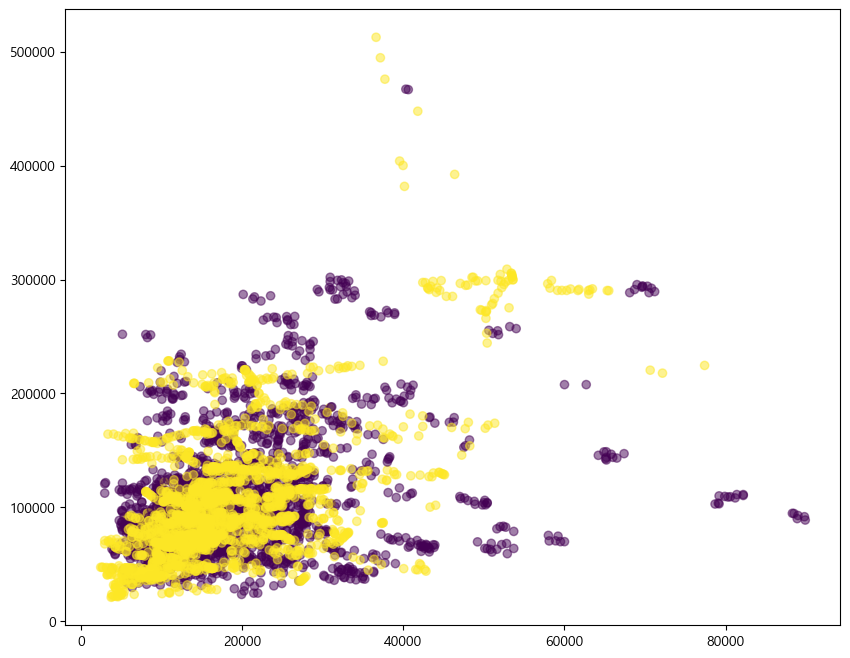

In [20]:
# 데이터 결합 및 산점도 확인
df_resampled = pd.concat([x_resampled,y_resampled], axis=1)
print(df_resampled.head())

# 목표변수 산점도 확인:위와 다른 방식으로 색깔 구분
plt.figure(figsize=(10,8))
plt.scatter(df_resampled['LOAN'],df_resampled['VALUE'],
            c=df_resampled['BAD'],alpha=0.5)
plt.show()

## 모델 생성

### Default option Moel

In [21]:
tree_uncust = DecisionTreeClassifier(random_state=1234 )
tree_uncust.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncust.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.932


In [22]:
# 실행옵션 확인
print(tree_uncust.get_params().keys())
print(tree_uncust.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1234, 'best'])


### @max_depth(최대 깊이) 변화에 따른 모델 성능

In [23]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경.
para_depth = [depth for depth in range(3, 12)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [24]:
para_depth

[3, 4, 5, 6, 7, 8, 9, 10, 11]

In [25]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,3,0.934,0.921
1,4,0.937,0.928
2,5,0.940,0.930
3,6,0.941,0.930
4,7,0.947,0.935
5,8,0.951,0.933
6,9,0.957,0.933
7,10,0.960,0.938
8,11,0.963,0.936


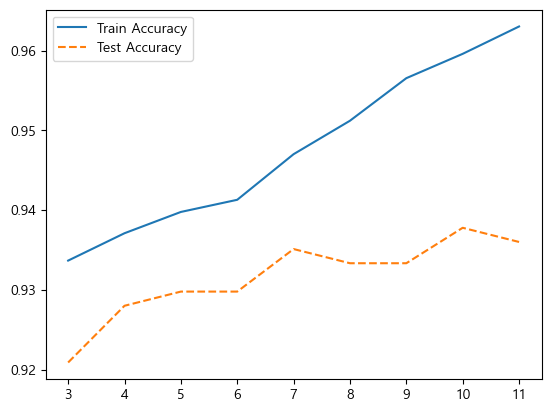

In [26]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

#### 깊이(max_depth)에 따른 결과 확인
* 깊이 = 4 : 간단한 모델..under-fitting, 정확도 미흡
* 깊이 = 7 : 적절? ?
* 깊이 = 10 : 복잡한 모델..over-fitting, Train~Test 정확도 차이 큼 

In [27]:
# 변수명 저장
v_feature_name = df_train_x.columns

In [29]:
# max_depth, 깊이: 얕은 모델
tree_low = DecisionTreeClassifier(max_depth = 4, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

# # 트리 모델을 tree_low.dot 파일로 저장. (목표변수 레이블 지정(class_names):0-Good,1-Bad)
# export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["Good", "Bad"], 
#                 feature_names = v_feature_name, impurity = True, filled = True)

# # 트리 결과 시각화
# with open("tree_low.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

DecisionTreeClassifier(max_depth=4, random_state=1234)

In [31]:
# # 생성된 .dot 파일을 .png로 변환
# call(['dot', '-Tpng', 'tree_low.dot', '-o', 'tree_low.png', '-Gdpi=600'])
# # jupyter notebook에서 작업디렉토리에 있는 .png 직접 출력
# Image(filename = 'tree_low.png')

In [33]:
# max_depth 깊이:깊은 모델
tree_high = DecisionTreeClassifier(max_depth = 7, random_state=1234)
tree_high.fit(df_train_x, df_train_y)

# export_graphviz(tree_high, out_file="tree_high.dot", class_names = ["Good", "Bad"],
#                 feature_names = v_feature_name, impurity = True, filled = True)
# #                 feature_names = v_feature_name, impurity = True, filled = True, max_depth=5) # 표시 max_depth 지정 가능

# with open("tree_high.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

DecisionTreeClassifier(max_depth=7, random_state=1234)

In [34]:
# # 생성된 .dot 파일을 .png로 변환
# call(['dot', '-Tpng', 'tree_high.dot', '-o', 'tree_high.png', '-Gdpi=600'])
# # jupyter notebook에서 작업디렉토리에 있는 .png 직접 출력
# Image(filename = 'tree_high.png')

### @min_samples_split(분리노드의 최소 샘플 수) 조정에 따른 정확도 변화

#### 참조:적정 크기를 어떻게 결정할  것인가?
* Data의 자료 수 참조...1~5% ?(절대적인 기준은 없음!!)
* 단, leaf 크기의 2배 수준 고려

* min_samples_split 증가 -> 모델 정확도 감소 

In [35]:
# 참조:적정 자료 수 검토:Train Data 자료 수
print("전체 자료 = ", df_train_x.shape[0],"개")
print("전체 자료의 1% = ", df_train_x.shape[0] * 0.01,"개")

전체 자료 =  2623 개
전체 자료의 1% =  26.23 개


In [36]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 10 for n_split in range(2, 16)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth=7, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [37]:
para_split

[20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

In [38]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.942,0.930
1,30,0.937,0.922
2,40,0.937,0.922
3,50,0.937,0.922
4,60,0.937,0.922
5,70,0.937,0.922
6,80,0.937,0.922
7,90,0.937,0.922
8,100,0.937,0.922
9,110,0.937,0.922


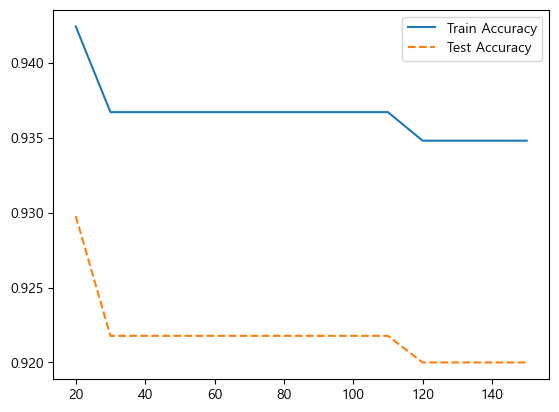

In [39]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

##### @해석 : 
▶ 분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하며
30에서 성능이 약간 저하되고 이후 큰 변화가 없음. 전체 자료수 및 파라미터 특징(max_XXX)을 고려하여 50 선택(전체 자료의 1% 수준)

##### 분리 노드의 최소 샘플 수(min_samples_split)에 따른 차이 

In [41]:
# 분리 노드의 최소 자료 수:적은 모델
tree_low = DecisionTreeClassifier(max_depth=7, min_samples_split=50, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

# export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["Good", "Bad"],
#                 feature_names = v_feature_name, impurity = True, filled = True)

# with open("tree_low.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

DecisionTreeClassifier(max_depth=7, min_samples_split=50, random_state=1234)

In [42]:
# # 생성된 .dot 파일을 .png로 변환
# call(['dot', '-Tpng', 'tree_low.dot', '-o', 'tree_low.png', '-Gdpi=600'])
# # jupyter notebook에서 작업디렉토리에 있는 .png 직접 출력
# Image(filename = 'tree_low.png')

In [43]:
# 분리 노드의 최소 자료 수: 많은 모델
tree_high = DecisionTreeClassifier(max_depth=7, min_samples_split=110, random_state=1234)
tree_high.fit(df_train_x, df_train_y)

# export_graphviz(tree_high, out_file="tree_high.dot", class_names = ["Good", "Bad"],
#                 feature_names = v_feature_name, impurity = True, filled = True)

# with open("tree_high.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

DecisionTreeClassifier(max_depth=7, min_samples_split=110, random_state=1234)

In [44]:
# # 생성된 .dot 파일을 .png로 변환
# call(['dot', '-Tpng', 'tree_high.dot', '-o', 'tree_high.png', '-Gdpi=600'])
# # jupyter notebook에서 작업디렉토리에 있는 .png 직접 출력
# Image(filename = 'tree_high.png')

### @min_samples_leaf(잎사귀 노드의 샘플 수) 조정에 따른 정확도 변화

#### 참조:적정 크기를 어떻게 결정할 것인가?
* Data의 자료 수 참조...0.5~5% ?(절대적인 기준은 없음!!)
 
* min_samples_leaf 증가 -> 모델 정확도 감소

In [45]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 노드 최소 자료 수. 
para_leaf = [n_leaf * 2 for n_leaf in range(5,16)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split=50, \
		max_depth=7, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [46]:
para_leaf

[10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]

In [47]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.935,0.919
1,12,0.935,0.918
2,14,0.934,0.922
3,16,0.934,0.922
4,18,0.934,0.922
5,20,0.934,0.920
6,22,0.934,0.927
7,24,0.934,0.927
8,26,0.934,0.927
9,28,0.933,0.925


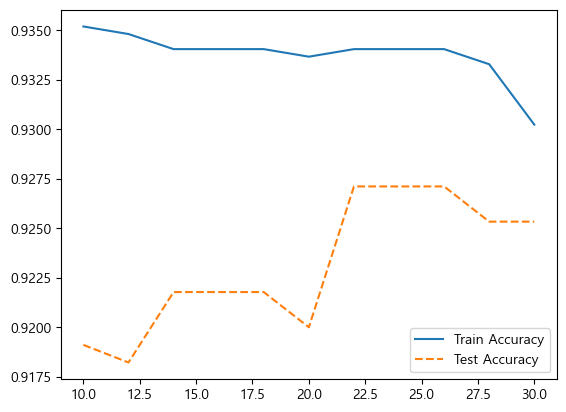

In [48]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

##### @해석 : 10 초과 ->모델 정확도가 급격히 감소됨

#### 잎사귀 노드의 샘플 수(min_samples_leaf)에 따른 차이

In [49]:
# 잎사귀의 최소 자료 수가 8인 모델
tree_low = DecisionTreeClassifier(max_depth=7, min_samples_split=50, min_samples_leaf=14, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

# export_graphviz(tree_low, out_file=" tree_low.dot", class_names = ["Good", "Bad"],
#                 feature_names = v_feature_name, impurity = True, filled = True)

# with open(" tree_low.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

DecisionTreeClassifier(max_depth=7, min_samples_leaf=14, min_samples_split=50,
                       random_state=1234)

In [50]:
# # 생성된 .dot 파일을 .png로 변환
# call(['dot', '-Tpng', 'tree_low.dot', '-o', 'tree_low.png', '-Gdpi=600'])
# # jupyter notebook에서 작업디렉토리에 있는 .png 직접 출력
# Image(filename = 'tree_low.png')

In [51]:
# 잎사귀의 최소 자료 수가 10인 모델
tree_high = DecisionTreeClassifier(max_depth=7, min_samples_split=50, min_samples_leaf=18, random_state=1234)
tree_high.fit(df_train_x, df_train_y)

# export_graphviz(tree_high, out_file="tree_high.dot", class_names = ["Good", "Bad"],
#                 feature_names = v_feature_name, impurity = True, filled = True)

# with open("tree_high.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

DecisionTreeClassifier(max_depth=7, min_samples_leaf=18, min_samples_split=50,
                       random_state=1234)

In [52]:
# # 생성된 .dot 파일을 .png로 변환
# call(['dot', '-Tpng', 'tree_high.dot', '-o', 'tree_high.png', '-Gdpi=600'])
# # jupyter notebook에서 작업디렉토리에 있는 .png 직접 출력
# Image(filename = 'tree_high.png')

##### @해석 : 조건에 따라 일부 차이 확인 
* 분리 자료 수 차이 -> 분리 기준 차이 

## 최종 모델 선정 / 시각화

#### 최종 모델:분석가 판단에 따라 변경 가능

In [53]:
tree_final = DecisionTreeClassifier(max_depth=7, min_samples_split=50, min_samples_leaf=14, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=14, min_samples_split=50,
                       random_state=1234)

In [55]:
# # tree_final.dot으로 결과 저장
# export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["Good", "Bad"],
#                 feature_names = v_feature_name, impurity = True, filled = True)

# with open("tree_final.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

In [56]:
# # 생성된 .dot 파일을 .png로 변환
# call(['dot', '-Tpng', 'tree_final.dot', '-o', 'tree_final.png', '-Gdpi=600'])
# # jupyter notebook에서 작업디렉토리에 있는 .png 직접 출력
# Image(filename = 'tree_final.png')

In [57]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Test Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Test Accuracy: 0.922

Test Confusion matrix: 
[[1002   19]
 [  69   35]]
              precision    recall  f1-score   support

           0      0.936     0.981     0.958      1021
           1      0.648     0.337     0.443       104

    accuracy                          0.922      1125
   macro avg      0.792     0.659     0.700      1125
weighted avg      0.909     0.922     0.910      1125



#### 설명변수 중요도
* Importance는 상대적인 값
* Importance = 0 -> 적용 모델의 가지 분리시 해당 변수가 사용되지 않았다는 의미->다른 모델 생성 시에는 변경될 수 있음!!

In [58]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.566
5,DELINQ,0.139
6,CLAGE,0.088
8,CLNO,0.075
4,DEROG,0.059
2,VALUE,0.037
7,NINQ,0.037
12,JOB_Mgr,0.000
16,JOB_Sales,0.000
15,JOB_ProfExe,0.000


Text(0, 0.5, '설명변수')

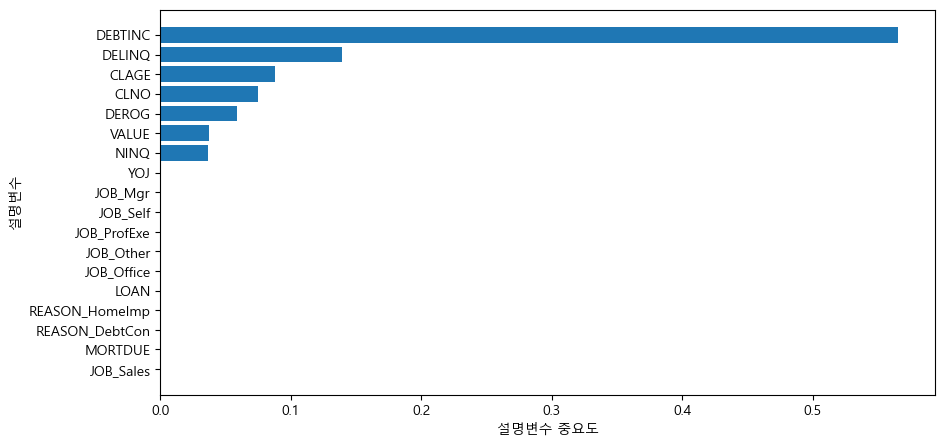

In [59]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))

plt.figure(figsize=(10,5))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

#### 참고: 분리기준 변경 및 결과 확인

In [60]:
tree_final2 = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=50, min_samples_leaf=14, random_state=1234)
tree_final2.fit(df_train_x, df_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=14,
                       min_samples_split=50, random_state=1234)

In [63]:
# # tree_final.dot으로 결과 저장
# export_graphviz(tree_final2, out_file="tree_final2.dot", class_names = ["Good", "Bad"],
#                 feature_names = v_feature_name, impurity = True, filled = True)

# with open("tree_final2.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

In [64]:
# # 생성된 .dot 파일을 .png로 변환
# call(['dot', '-Tpng', 'tree_final2.dot', '-o', 'tree_final2.png', '-Gdpi=600'])
# # jupyter notebook에서 작업디렉토리에 있는 .png 직접 출력
# Image(filename = 'tree_final2.png')

In [65]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.922

Confusion matrix: 
[[1002   19]
 [  69   35]]
              precision    recall  f1-score   support

           0      0.936     0.981     0.958      1021
           1      0.648     0.337     0.443       104

    accuracy                          0.922      1125
   macro avg      0.792     0.659     0.700      1125
weighted avg      0.909     0.922     0.910      1125



#### 설명변수 중요도
* Importance는 상대적인 값
* Importance = 0 -> 적용 모델의 가지 분리시 해당 변수가 사용되지 않았다는 의미->다른 모델 생성 시에는 변경될 수 있음!!

In [66]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.566
5,DELINQ,0.139
6,CLAGE,0.088
8,CLNO,0.075
4,DEROG,0.059
2,VALUE,0.037
7,NINQ,0.037
12,JOB_Mgr,0.000
16,JOB_Sales,0.000
15,JOB_ProfExe,0.000


### @추가연습:Over-sampling Data이용한 모델링 및 평가

#### Over-Sampling 데이터 분할-> 모델 비교

* SMOTE Over-Sampling에 따라 선택되는 데이터가 다를 수 있어

In [67]:
# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x_over, df_test_x_over, df_train_y_over, df_test_y_over = train_test_split(
    x_resampled, y_resampled, test_size = 0.3, stratify=y_resampled, random_state = 1234) 

print("분할 전 데이터 현황... 설명:", x_resampled.shape, "  목표:", y_resampled.shape)
print("분할 후 설명변수 현황...Train:", df_train_x_over.shape, " Test:", df_test_x_over.shape)
print("분할 후 목표변수 현황...Train:", df_train_y_over.value_counts(), " Test:", df_test_y_over.value_counts())

분할 전 데이터 현황... 설명: (4764, 18)   목표: (4764,)
분할 후 설명변수 현황...Train: (3334, 18)  Test: (1430, 18)
분할 후 목표변수 현황...Train: BAD
1    1667
0    1667
Name: count, dtype: int64  Test: BAD
1    715
0    715
Name: count, dtype: int64


In [68]:
# 최종 모델의 hyper-parameter 이용: 원칙은 하이퍼 파라미터 튜닝 필요
tree_final_over = DecisionTreeClassifier(max_depth=7, min_samples_split=50, min_samples_leaf=14, random_state=1234)

# Over-sampling Data 지정
tree_final_over.fit(df_train_x_over, df_train_y_over)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=14, min_samples_split=50,
                       random_state=1234)

In [69]:
# # tree_final.dot으로 결과 저장
# export_graphviz(tree_final_over, out_file="tree_final_over.dot", class_names = ["Good", "Bad"],
#                 feature_names = v_feature_name, impurity = True, filled = True)

# with open("tree_final_over.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

### ...다른 방식의 Tree 시각화(이미지가 큰 경우)

In [ ]:
# 생성된 .dot 파일을 .png로 변환
call(['dot', '-Tpng', 'tree_final_over.dot', '-o', 'tree_final_over.png', '-Gdpi=600'])

# jupyter notebook에서 작업디렉토리에 있는 .png 직접 출력
Image(filename = 'tree_final_over.png')

In [70]:
# 평가
y_pred_over = tree_final_over.predict(df_test_x_over)
print("Test Accuracy: {0:.3f}\n".format(tree_final_over.score(df_test_x_over, df_test_y_over)))
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y_over, y_pred_over)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y_over, y_pred_over, digits=3))

Test Accuracy: 0.838

Test Confusion matrix: 
[[651  64]
 [168 547]]
              precision    recall  f1-score   support

           0      0.795     0.910     0.849       715
           1      0.895     0.765     0.825       715

    accuracy                          0.838      1430
   macro avg      0.845     0.838     0.837      1430
weighted avg      0.845     0.838     0.837      1430



In [71]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final_over.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,DELINQ,0.419
9,DEBTINC,0.185
6,CLAGE,0.099
2,VALUE,0.090
10,REASON_DebtCon,0.053
7,NINQ,0.048
8,CLNO,0.033
16,JOB_Sales,0.030
1,MORTDUE,0.020
4,DEROG,0.008


Text(0, 0.5, '설명변수')

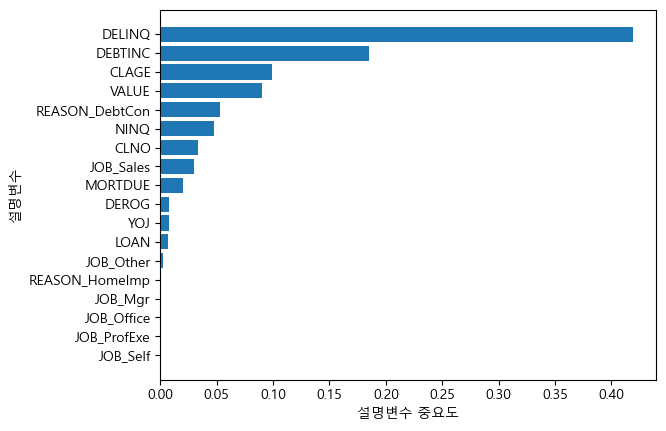

In [72]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## Grid Search
* Tree 모델의 hyper-parameter의 최적값 탐색
* grid(값의 격자) 방식으로 값을 변경/조합하면서 모델의 성능 비교
* 반복 모델 생성시 CV(cross-validation) 방식으로 data 선택 -> 개별 모델과 최적값이 다를 수 있음  

In [73]:
estimator = DecisionTreeClassifier()
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 정확도가 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=20)

best parameter: 
{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 20}

best score: 
0.93


##### @해석 : 선정된 hyper-parameter가 타당(?) 하지 않을 수 있음
              실제로 존재할 수 없는 조합이 가장 성능이 좋은 것으로 나타나는 경우가 있기 때문
              (ex. 'max_depth'가 1이고 'min_samples_split'이 100인 경우 발생)  
              
* 분석가 모델 조건 : 
        class_weight=None, criterion='gini', max_depth=4,
        max_features=None, max_leaf_nodes=None,
        min_impurity_decrease=0.0, min_impurity_split=None,
        min_samples_leaf=8, min_samples_split=20,
        min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
        splitter='best')